# Test task for the Summer intership at Evolution gaming

<i>Anastasia Gorbunova</i>

## Импорт и изучение данных

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

In [236]:
# Создадим объект DataFrame путем чтения данных из файла csv
df = pd.read_csv('D:/Курсы/Evolution Gaming/Задание/ds_internship_task/ds_internship_task/insurance.csv', sep=',')

In [237]:
#Укажем размер графиков, стиль фона, цветовую палитру
sns.set_context({"figure.figsize": (10, 5)})
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("RdBu_r", 10))

<b>Имеем датасет, содержащий 1338 записей и 7 признаков</b>

In [238]:
# Размерность
df.shape

(1338, 7)

In [239]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<b>Краткая статистика</b>

In [240]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [241]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [242]:
pd.Series({ col: len(pd.unique(df[col])) for col in df })

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<b>Проверим, есть ли пропуски в столбцах</b>

In [243]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

## Работа с признаками

<b>Посмотрим на распределение charges. Можем наблюдать, что в 75% записях значение charges меньше 16639, 20% записей со значениями charges выше 20000. Максимальное значение 63770</b>

In [244]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [245]:
len(df[df['charges']>20000])/len(df)*100

20.40358744394619

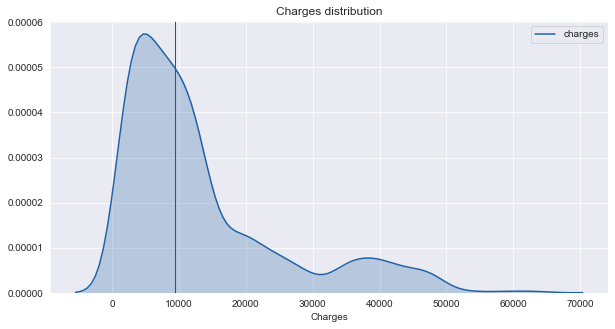

In [246]:
sns.kdeplot(df['charges'], shade=True);
plt.axvline(df['charges'].median(), c='red', linewidth=1);
plt.xlabel('Charges');
plt.title('Charges distribution');

<b>Посмотрим на признак children. Можем наблюдать, что в 42,9% записях количество детей равно 0. Далее количество записей уменьшается с увеличением количества детей. Максимальное значение children равно 5.</b>

In [247]:
df['children'].value_counts(normalize=True)*100

0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64

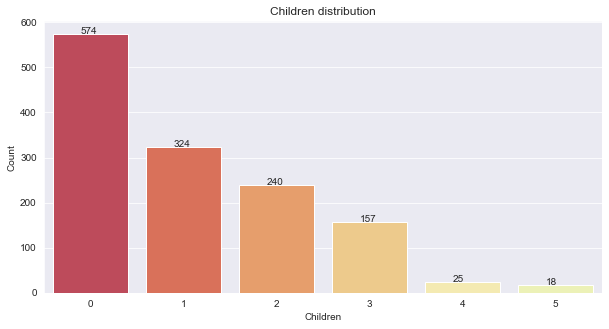

In [248]:
sns.set_palette(sns.color_palette("Spectral", 10))
ax = sns.countplot(df['children'], order=df['children'].value_counts().index);
plt.xlabel('Children');
plt.ylabel('Count');
plt.title('Children distribution');
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

<b>Посмотрим на признак age. Можем наблюдать, что распределение по возрастам почти равномерное, за исключением лидирующих возрастов (18 и 19 лет).</b>

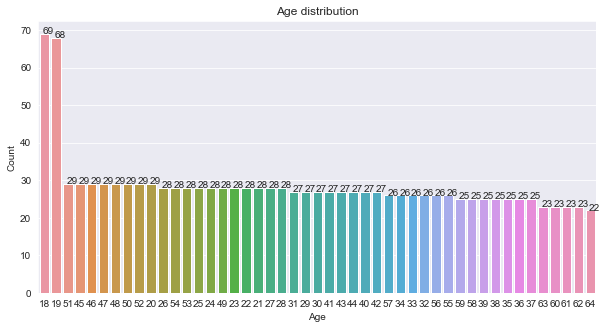

In [249]:
sns.set_palette(sns.color_palette("Spectral", 10))
ax = sns.countplot(df['age'], order=df['age'].value_counts().index);
plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Age distribution');
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

<b>Распределение признаков sex и region практически равномерное</b>

In [250]:
df['sex'].value_counts(normalize=True)*100

male      50.523169
female    49.476831
Name: sex, dtype: float64

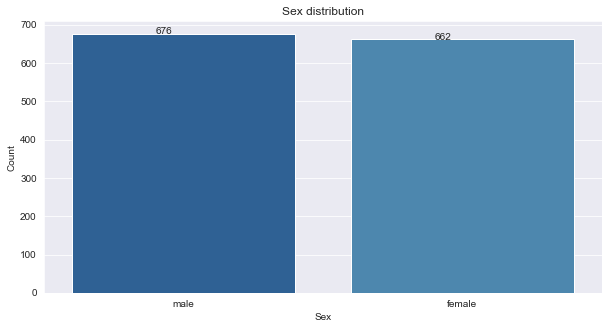

In [251]:
sns.set_palette(sns.color_palette("RdBu_r", 10))
ax = sns.countplot(df['sex'], order=df['sex'].value_counts().index);
plt.xlabel('Sex');
plt.ylabel('Count');
plt.title('Sex distribution');
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

In [252]:
df['region'].value_counts(normalize=True)*100

southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: region, dtype: float64

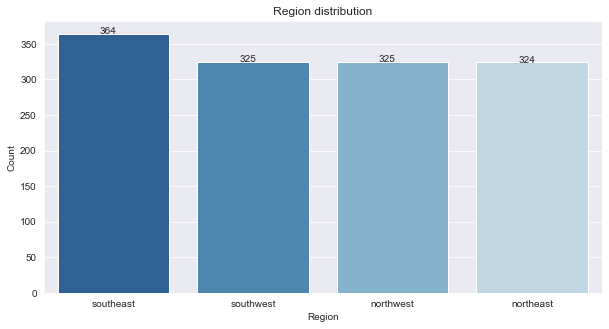

In [253]:
sns.set_palette(sns.color_palette("RdBu_r", 10))
ax = sns.countplot(df['region'], order=df['region'].value_counts().index);
plt.xlabel('Region');
plt.ylabel('Count');
plt.title('Region distribution');
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

<b>А вот распределение значений smoker выглядит следующим образом: 79,5% некурящих и 20,5% курящих, что очень схоже с распределением показателя charges (80% до 20000 и 20% после 20000). Как связаны показатели smoker и charges, будет показано далее.</b>

In [254]:
df['smoker'].value_counts(normalize=True)*100

no     79.521674
yes    20.478326
Name: smoker, dtype: float64

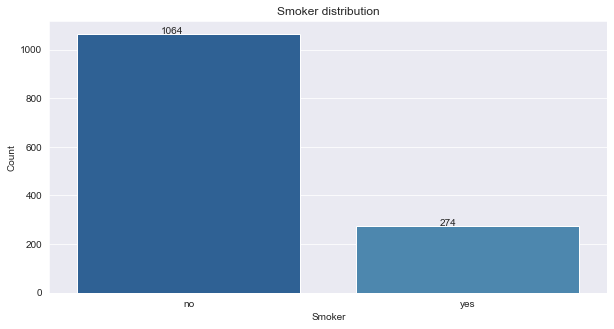

In [255]:
ax = sns.countplot(df['smoker'], order=df['smoker'].value_counts().index);
plt.xlabel('Smoker');
plt.ylabel('Count');
plt.title('Smoker distribution');
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

<b>Наблюдаем нормальное распределение показателя bmi</b>

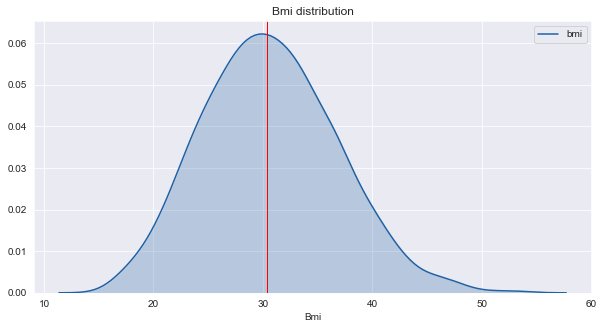

In [256]:
sns.kdeplot(df['bmi'], shade=True);
plt.axvline(df['bmi'].median(), c='red', linewidth=1);
plt.xlabel('Bmi');
plt.title('Bmi distribution');

<b>Построим корреляционную матрицу</b>

In [257]:
df_copy = df.copy()
for i in range(len(df_copy)):
    if (df.loc[i,'smoker'] == 'no'):
        df_copy.loc[i,'sm'] = 1
    else:
        df_copy.loc[i,'sm'] = 2
for i in range(len(df_copy)):
    if (df_copy.loc[i,'sex'] == 'male'):
        df_copy.loc[i,'se'] = 1
    else:
        df_copy.loc[i,'se'] = 2
for i in range(len(df_copy)):
    if (df_copy.loc[i,'region'] == 'northeast'):
        df_copy.loc[i,'rg'] = 1
    elif (df_copy.loc[i,'region'] == 'northwest'):
        df_copy.loc[i,'rg'] = 2
    elif (df_copy.loc[i,'region'] == 'southeast'):
        df_copy.loc[i,'rg'] = 3
    else:
        df_copy.loc[i,'rg'] = 4
df_copy = df_copy.drop(['smoker'],axis=1)
df_copy = df_copy.drop(['sex'],axis=1)
df_copy = df_copy.drop(['region'],axis=1)
df_copy.rename(columns={'se': 'sex', 'sm': 'smoker', 'rg': 'region'}, inplace=True)

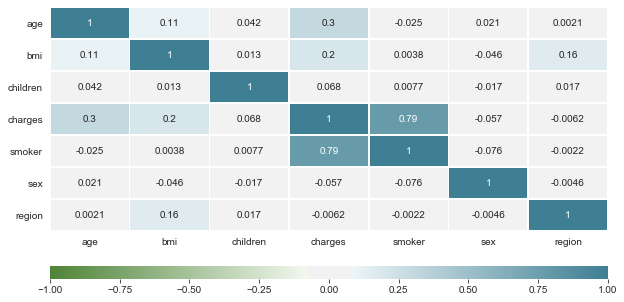

In [258]:
corr_matrix = df_copy.corr()
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
cmap = sns.diverging_palette(120, 220, sep=20, as_cmap=True)
ax = sns.heatmap(corr_matrix, ax=ax, cmap=cmap,linewidths=.5,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"},annot=True,vmin=-1, vmax=1, center= 0)

<b>Можем наблюдать наибольшую корреляцию charges с smoker</b>

In [259]:
corr_matrix['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
region     -0.006208
sex        -0.057292
Name: charges, dtype: float64

<b>Построим регрессию и посчитаем корреляцию</b>

<b>Выше наблюдаем достаточно низкий уровень корреляции, но, помимо этого, видим, что данные делятся на 3 группы:
- с charges до 15000
- с charges от 15000 до 30000
- с charges от 30000</b>

c:\users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



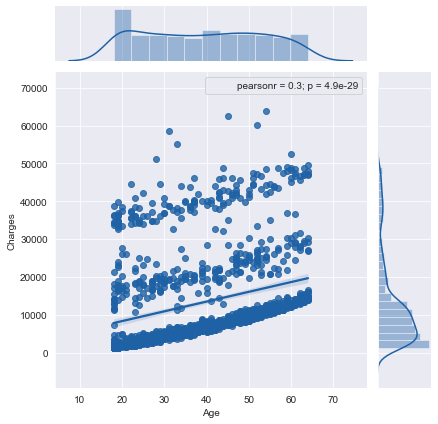

In [154]:
j = sns.jointplot(df_copy['age'], y=df_copy['charges'], kind='reg')
j.annotate(stats.pearsonr)
plt.xlabel('Age');
plt.ylabel('Charges');

<b>1 Группа (с charges до 15000)</b>

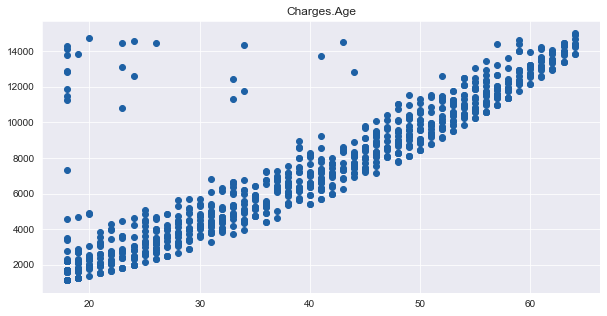

In [157]:
df_1 = df_copy.copy()
df_1 = df_1[df_1['charges']<= 15000]
plt.scatter(df_1.age, df_1.charges);
plt.title('Charges.Age');

<b>Здесь важно отметить, что в эту группу попали 99,3% некурящих людей и 0,7% курящих. По остальным показателям распределение признаков практически не изменилось.</b>

In [182]:
df_1['smoker'].value_counts(normalize=True)*100

1.0    99.285714
2.0     0.714286
Name: smoker, dtype: float64

<b>2 Группа (с charges от 15000 до 30000)</b>

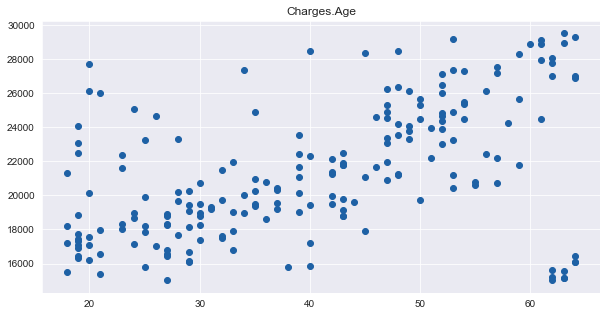

In [164]:
df_2 = df.copy()
df_2 = df_2[(df_2['charges']> 15000) & (df_2['charges']<= 30000)]
plt.scatter(df_2.age, df_2.charges);
plt.title('Charges.Age');

<b>Здесь важно отметить, что в этой группе средний показатель bmi 28.</b>

In [167]:
df_2['bmi'].mean()

28.06145408163266

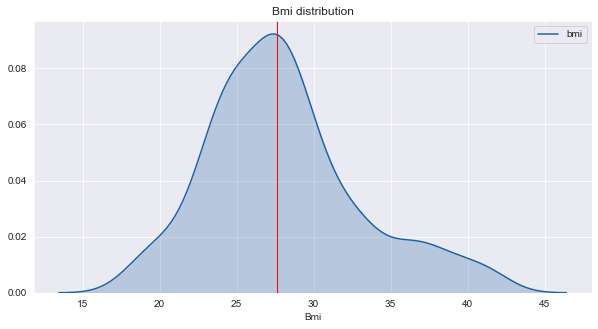

In [166]:
sns.kdeplot(df_2['bmi'], shade=True);
plt.axvline(df_2['bmi'].median(), c='red', linewidth=1);
plt.xlabel('Bmi');
plt.title('Bmi distribution');

<b>59% Курящих и 41% некурящих людей.</b>

In [260]:
df_2['smoker'].value_counts(normalize=True)*100

yes    58.673469
no     41.326531
Name: smoker, dtype: float64

<b>3 Группа (с charges выше 35000)</b>

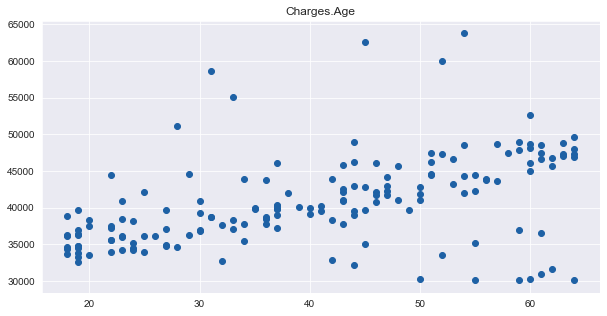

In [169]:
df_3 = df.copy()
df_3 = df_3[df_3['charges']> 30000]
plt.scatter(df_3.age, df_3.charges);
plt.title('Charges.Age');

<b>Здесь важно отметить, что в этой группе средний показатель bmi 35.</b>

In [170]:
df_3['bmi'].mean()

34.845432098765436

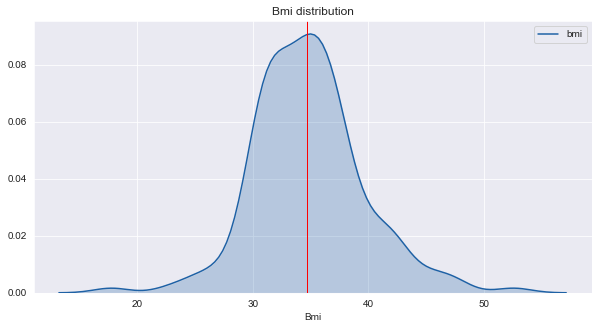

In [171]:
sns.kdeplot(df_3['bmi'], shade=True);
plt.axvline(df_3['bmi'].median(), c='red', linewidth=1);
plt.xlabel('Bmi');
plt.title('Bmi distribution');

<b>94% Курящих и 6% некурящих людей.</b>

In [172]:
df_3['smoker'].value_counts(normalize=True)*100

yes    93.82716
no      6.17284
Name: smoker, dtype: float64

По предверительному анализу некурящие люди имеют большую вероятность попасть в группу с низким показателем charges, люди с высоким bmi чаще попадают в группу с высоким charges (при этом если человек курит, то вероятность высокого показателя charges возрастает). Из scatterplot видно, что с увеличением возраста внутри группы значение charges увеличивается. Теперь построим регрессионную модель, которая на основании приведенных признаков сможет спрогнозировать значение charges для людей.


## Построение модели

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

<b>Поскольку в датасете есть всего 1338 записей, можно сказать, что датасет мал по стандартам машинного обучения. Поэтому модель может быть не такая точная, как при работе с большими датасетами.</b>

При выборе наилучшей модели были проанализированы:
- LinearRegression (RMSE = 5680)
- RandomForestRegressor (RMSE = 4558)
- CatBoostRegressor (RMSE = 4208)
- GradientBoostingRegressor (RMSE = 4007)
- XGBRegressor (RMSE = 4813)

После анализа работы моделей качестве модели была выбрана модель Gradient Boosting Regression

<b>Разобъём данные на обучающие и тестовые</b>

In [186]:
Y = df_copy['charges']
X = df_copy.drop(['charges'],axis=1)
seed = 100
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)

<b>Проведём настройку модели решётчатым поиском</b>

In [199]:
param_grid = [
    {'n_estimators': [50, 70, 100, 150, 200, 300], 'max_depth': [2, 3, 4]}]
model = ensemble.GradientBoostingRegressor()
grid_search = GridSearchCV(model, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

<b>Получаем наилучшую комбинацию параметров</b>

In [200]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [201]:
model = ensemble.GradientBoostingRegressor(n_estimators=50)
model.fit(X_train,y_train)

## Оценка качества модели

<b>Качество модели помогут оценить ошибки MAE, MSE, RMSE, R2</b>

In [207]:
predictions = model.predict(X_test)
original = y_test.values
d = original - predictions
mae = abs(d).mean()
mse = (d ** 2).mean()
rmse = math.sqrt(mse)
r2 = 1 - ((d ** 2).sum())/(original-(original ** 2).mean()).sum()
print('Gradient Boosting Regressor')
print('Mean Absolute Error = ', mae)
print('Root Mean Squared Error = ', rmse)
print('Coefficient of determination = ', r2)

Gradient Boosting Regressor
Mean Absolute Error =  2400.2649751266276
Root Mean Squared Error =  3999.0427819289075
Coefficient of determination =  1.045004477298798


<b>Диагностировать качество модели также поможет связь между остатками модели и предсказанными значениями (Residuals plot). C его помощью мы можем увидет нелинейность и выбросы, проверить случайность распределения ошибки. На графике видим в среднем хорошие показатели для тестовых и обучающих данных, за исключением некоторого числа выбросов.</b>

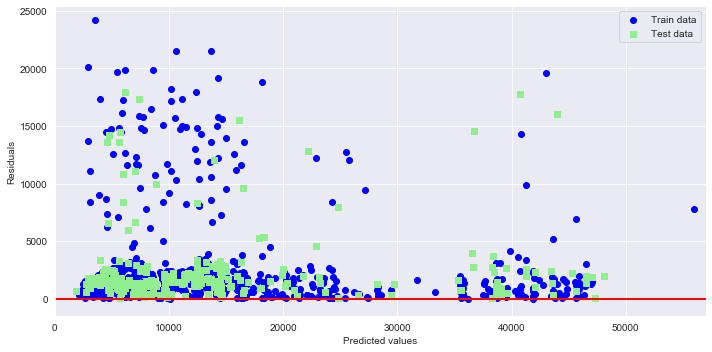

In [261]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.scatter(y_train_pred,  abs(y_train_pred - y_train),
            c='blue', marker='o', label='Train data')
plt.scatter(y_test_pred,  abs(y_test_pred - y_test),
            c='lightgreen', marker='s', label='Test data')
plt.hlines(y=0, xmin=0, xmax=57000, lw=2, color='red')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.tight_layout()
plt.xlim([0, 57000]);

<b>Построим кривые обучения, чтобы проверить, нет ли у нас переобученности либо недообученности модели.</b>

Из графика видим, что ошибка на обучающих данных двигается вверх, пока не достигнет определенного значения. Что касается тестовых данных, по мере того, как модель видит все больше образцов, она обучается, а ошибка проверки соответственно медленно снижается. Мы можем говорить о хорошей работе модели, поскольку ошибка на тестовых данных по итогу получилась ниже, чем на обучающих данных.

In [223]:
def plot_learning_curves (model,Х,у) :
    X_train,X_test,y_train,y_test=train_test_split(X,у,test_size=0.2,random_state=100)
    train_errors,test_errors=[],[]
    for n in range(1,len(X_train)):
        model.fit(X_train[:n], y_train[:n])
        y_train_predict=model.predict(X_train[:n])
        y_test_predict=model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:n]))
        test_errors.append(mean_squared_error(y_test_predict,y_test))
    plt.plot(np.sqrt(train_errors),"r-",linewidth=2,label="TRAIN")
    plt.plot(np.sqrt(test_errors),"b-",linewidth=2,label="TEST")
    plt.xlabel('Set size')
    plt.ylabel('RSME')
    plt.legend(loc='upper right')

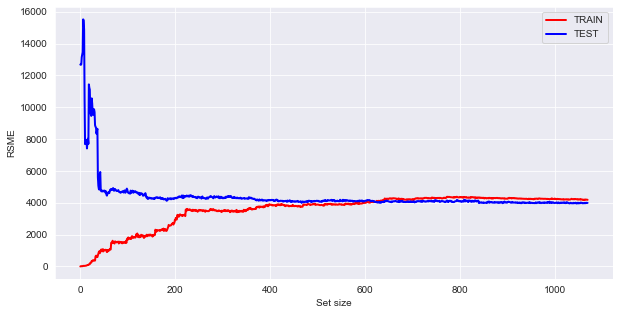

In [224]:
reg = ensemble.GradientBoostingRegressor(n_estimators=50)
plot_learning_curves(reg,X,Y)

## Определение признаков, оказывающих наибольшее влияние

<b>Посмотрим на feature importance для данной модели. Из графика можно наблюдать, что, как и предполагалось, наибольшее влияние оказывает smoker, далее bmi и age.</b>

In [231]:
importance = model.feature_importances_
feature_imp = pd.DataFrame(columns=['age','bmi','children','sex','region','smoker'])
feature_imp = feature_imp.append({'age': importance[0]*100, 'bmi': importance[1]*100, 'children': importance[2]*100, 'smoker':  importance[3]*100, 'sex':  importance[4]*100, 'region':  importance[5]*100}, ignore_index=True)
feature_imp = feature_imp.T
feature_imp = feature_imp.sort_values(by = 0)

In [232]:
feature_imp 

,0
sex,0.020888
region,0.282787
children,0.819079
age,12.284633
bmi,17.953774
smoker,68.638837


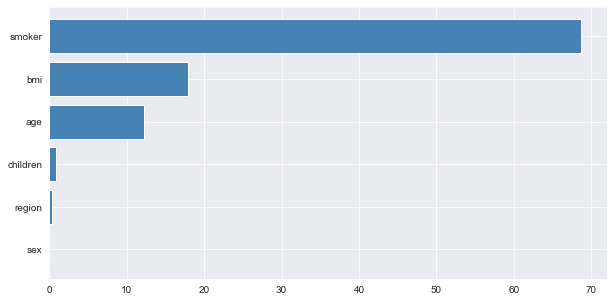

In [233]:
plt.barh(feature_imp.index,feature_imp[0],color = "steelblue");